# Unit 5 - Financial Planning

In [30]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [31]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [32]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [33]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [34]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
current_btc_value = btc_response_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
current_eth_value = eth_response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = (my_btc) * (current_btc_value)
my_eth_value = (my_eth) * (current_eth_value)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $24592.80
The current value of your 5.3 ETH is $8336.69


In [35]:
crypto = (my_btc_value) + (my_eth_value)
print(crypto)

32929.488


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [36]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [37]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [38]:
# Format current date as ISO format
today = pd.Timestamp("2022-10-28", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG']
SPY = df_portfolio[df_portfolio['symbol']=='SPY']

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
display(df_portfolio)

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-10-28 04:00:00+00:00  95.01  95.46  94.98  95.22  6224403       25972   

                                                SPY                          \
                                vwap symbol    open    high     low   close   
timestamp                                                                     
2022-10-28 04:00:00+00:00  95.234097    AGG  379.87  389.52  379.68  389.02   

                                                                     
                              volume trade_count        vwap symbol  
timestamp                                                            
2022-10-28 04:00:00+00:00  100160252      597379  385.648651    SPY

In [39]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.22
Current SPY closing price: $389.02


In [40]:
# Compute the current value of shares
my_agg_value = (agg_close_price) * (my_agg)
my_spy_value = (spy_close_price) * (my_spy)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:.2f}")

The current value of your 50 SPY shares is $19451.00
The current value of your 200 AGG shares is $19044.00


In [41]:
shares = (my_agg_value) + (my_spy_value)
print(shares)

38495.0


### Savings Health Analysis

In [42]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = (my_btc_value) + (my_eth_value)

shares = (my_agg_value) + (my_spy_value)

In [43]:
# Create savings DataFrame
wallet_distro = {
    "amount":[shares, crypto]
}

asset_class = ['shares','crypto']

df_savings = pd.DataFrame(wallet_distro,index=asset_class)

# Display savings DataFrame
display(df_savings)

,amount
shares,38495.000
crypto,32929.488


<AxesSubplot: title={'center': 'Portfolio Composition'}, ylabel='amount'>

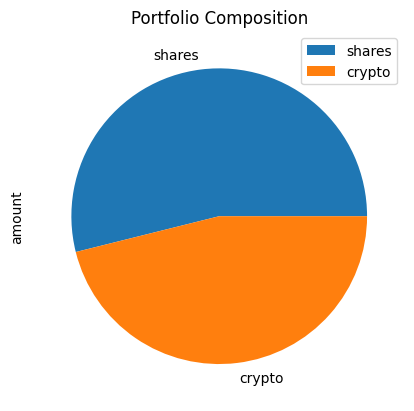

In [26]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Portfolio Composition")

In [27]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = (shares) + (crypto)
print(total_savings)

71424.488


In [28]:
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on saving the necessary amount to cover emergency expenses.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching a financial milestone.")
else:
    print(f"You're missing ${emergency_fund - total_savings:.2f}")

Congratulations on saving the necessary amount to cover emergency expenses.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [29]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-28', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop(['open', 'low','high','volume','trade_count','vwap','symbol'], axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop(['open', 'low','high','volume','trade_count','vwap','symbol'], axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30)

In [ ]:
# Printing the simulation input data
mc_thirty_year.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_year.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot=mc_thirty_year.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot=mc_thirty_year.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats = mc_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(sum_stats)

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(sum_stats[9]*(initial_investment),2)
ci_lower = round(sum_stats[8]*(initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment_mult = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(sum_stats[9]*(initial_investment_mult),2)
ci_lower = round(sum_stats[8]*(initial_investment_mult),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_year.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
mc_five_year.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
five_dist_plot = mc_five_year.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
opt_sum_stats_five = mc_five_year.summarize_cumulative_return()

# Print summary statistics
print(opt_sum_stats_five)

In [ ]:
# Set initial investment
five_initial_invest = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(opt_sum_stats_five[8]*(five_initial_invest),2)
ci_upper_five = round(opt_sum_stats_five[9]*(five_initial_invest),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_sim = mc_ten_sim = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_sim.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
ten_line_plot = mc_ten_sim.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot=mc_ten_sim.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats_ten = mc_ten_sim.summarize_cumulative_return()


# Print summary statistics
print(sum_stats_ten)

In [ ]:
# Set initial investment
ten_initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum_stats_ten[8]*(ten_initial_investment),2)
ci_upper_ten = round(sum_stats_ten[9]*(ten_initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${ten_initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")